# 線形回帰（教師有り学習）
ここから始まるレクチャーでは、線形回帰について学びます。 scikit-learnを使って、線形回帰のモデルを作り、新しいデータを使った予測を試みます。 サンプルデータは、アメリカの大都市ボストンの住宅価格です。初めは、1つだけの変数を使った単回帰をやってみます。

線形回帰の数学的な背景に興味がある場合は、以下のサイトが参考になります。

wikipedia（日本語）
wikipedia（英語）
Andrew Ngの動画（英語）もあります youtube.
4回に分かれているレクチャーの概要です。

Step 1: データの準備
Step 2: ひとまず可視化

Step 3: 最小二乗法の数学的な背景

Step 4: Numpyを使った単回帰

Step 5: 誤差について

Step 6: scikit-learnを使った重回帰分析

Step 7: 学習（Training）と検証Validation）

Step 8: 価格の予測

Step 9 : 残差プロット

## Step 1: データの準備
scikit-learnに用意されているサンプルデータを使います。

In [1]:
import numpy as np
import pandas as pd 
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
print(boston.DESCR) #Description

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of houses')

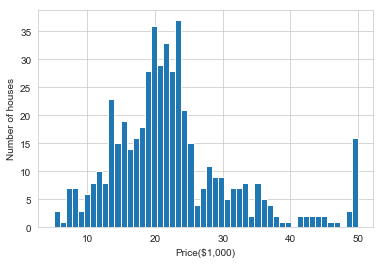

In [5]:
plt.hist(boston.target, bins=50)
plt.xlabel('Price($1,000)')
plt.ylabel('Number of houses')

Text(0, 0.5, 'Number of rooms')

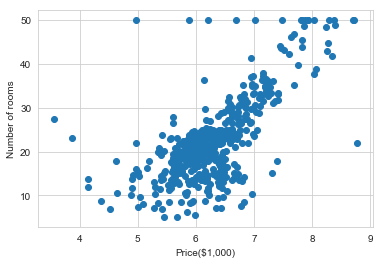

In [8]:
plt.scatter(boston.data[:,5], boston.target) #RMと価格
plt.xlabel('Price($1,000)')
plt.ylabel('Number of rooms')

In [9]:
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names

In [10]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
boston_df['Price'] = boston.target

In [12]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


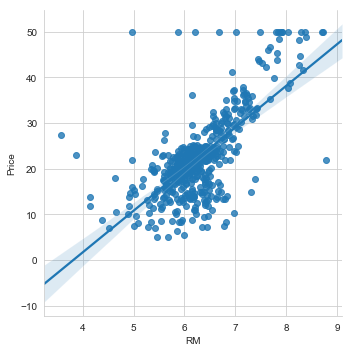

In [13]:
sns.lmplot('RM', 'Price', data=boston_df)

# 線形回帰その２

## Step 3: 最小二乗法の数学的な背景
回帰直線の係数を求めるのに使われる、「最小二乗法」について、すこし数学的になりますが、その背景を説明します。

回帰直線は、データ全体にうまく適合するように、描かれています。各点から、回帰直線への距離をDとしてみましょう。このDを最小にすれば良いわけです。このイメージを図にしてみます。

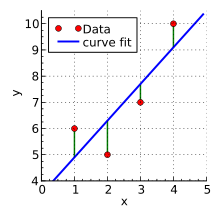

In [14]:
# wikipediaから拝借します。
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)

各点（赤）の座標は、(x, y)です。ここから、回帰直線（青線）への距離をDとすると、以下の値を最小にする直線が一番よさそうです。

d=D21+D22+D23+D24+....+D2N
 
直線の式は、

y=ax+b
 
で表現されます。いま、 a と b を求めたいのですが、これはdを最小にする a と b を見つけ出すという問題と同じです。

この問題はもちろん、手で計算することで解くことができますが、ここではこの計算をNumpyやscikit-leranにお任せします。 もし数学的な計算方法に興味がある方は、こちらが大変参考になります。

## Step 4: Numpyを使った単回帰
Numpyは線形代数のライブラリの一部に、最小二乗法を解く関数を持っています。 まずはこれを使って、単回帰(説明変数が1つ）をやってみます。その後、scikit-learnを使って、重回帰（説明変数が複数）に進んで行きましょう。

入力として、2つのarray（XとY）を用意します。

Yは目的変数なので1次元のarrayですが、Xは2次元のarrayで、行がサンプル、列が説明変数です。単回帰の場合は、列が1つになりますですので、そのshapeは、(506,1)です。これを作るには、いくつか方法がありますが、ここでは、vstackを使ってみます。

In [28]:
# 部屋数
X = boston_df.RM
print(X.shape)

(506,)


In [29]:
X

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
5      6.430
6      6.012
7      6.172
8      5.631
9      6.004
10     6.377
11     6.009
12     5.889
13     5.949
14     6.096
15     5.834
16     5.935
17     5.990
18     5.456
19     5.727
20     5.570
21     5.965
22     6.142
23     5.813
24     5.924
25     5.599
26     5.813
27     6.047
28     6.495
29     6.674
       ...  
476    6.484
477    5.304
478    6.185
479    6.229
480    6.242
481    6.750
482    7.061
483    5.762
484    5.871
485    6.312
486    6.114
487    5.905
488    5.454
489    5.414
490    5.093
491    5.983
492    5.983
493    5.707
494    5.926
495    5.670
496    5.390
497    5.794
498    6.019
499    5.569
500    6.027
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [30]:
# これを2次元のarrayにします。
X = np.vstack(boston_df.RM)
print(X.shape)

(506, 1)


In [31]:
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [37]:
Y = boston_df.Price
print(Y.shape)

(506,)


In [40]:
type(Y)

pandas.core.series.Series

In [33]:
#変形
#リスト内包記
X = np.array([ [value, 1] for value in X])

In [39]:
X.dtype

dtype('O')

In [35]:
type(X)

numpy.ndarray

In [42]:
X = X.astype(np.float64)
X.dtype

dtype('float64')

In [43]:
Y = Y.astype(np.float64)
Y.dtype

dtype('float64')

In [47]:
#最小二乗法の計算を実行
np.linalg.lstsq(X,Y)

/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


(array([  9.10210898, -34.67062078]),
 array([22061.87919621]),
 2,
 array([143.99484122,   2.46656609]))

In [48]:
#最小二乗法の計算を実行
a,b = np.linalg.lstsq(X,Y)[0]

/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


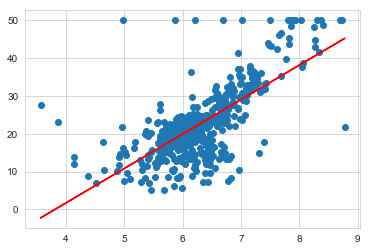

In [49]:
plt.plot(boston_df.RM, boston_df.Price, 'o')

x = boston_df.RM
plt.plot(x, a*x+b, 'r')


## Step 5: 誤差について
Pythonを使って、最小二乗法を用いて、単回帰を実行出来ました。 すべてのデータが完全に乗る直線を描くことは出来ませんので、どうしても誤差が出ます。

最小化しているのは、誤差の2乗和でした。ですので、全体の誤差が分かれば、それをサンプルの数で割って、平方根をとることで、ちょうど標準偏差のようなイメージで、平均誤差を計算できます。

numpy.linalg.lstsqのドキュメント（英語）

In [50]:
result = np.linalg.lstsq(X,Y)

/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [51]:
result

(array([  9.10210898, -34.67062078]),
 array([22061.87919621]),
 2,
 array([143.99484122,   2.46656609]))

In [52]:
error_total = result[1]
rmse = np.sqrt(error_total/len(x))  #root mean squere error

In [53]:
print('平均二乗誤差の平方根={:0.2f}'.format(rmse[0]))

平均二乗誤差の平方根=6.60



平均二乗誤差は、標準偏差に対応するので、95%の確率で、この値の2倍以上誤差が広がることは無いと結論付けあれます。 正規分布の性質を思い出したい方は、こちらを参照.

Thus we can reasonably expect a house price to be within $13,200 of our line fit.

## Step 6: scikit-learnを使った重回帰分析
それでは、重回帰へと話を進めましょう。 説明変数が1つだけだと単回帰ですが、重回帰は複数の説明変数を同時に扱うことができます。

scikit-learnの線形回帰ライブラリを利用します。 linear regression library

sklearn.linear_model.LinearRegressionクラスは、データを元にモデルを作り、予測値を返すことができます。 モデルを作る時には、fit()メソッドを呼び、予測をするときは、predict()メソッドを使います。 今回は重回帰モデルを使いますが、他のモデルも同じように、fitとpredictメソッドを実装しているところが、scikit-learnの便利なところです。

In [54]:
import sklearn
from sklearn.linear_model import LinearRegression

In [55]:
lreg = LinearRegression()

In [59]:
#説明変数の用意
X_multi = boston_df.drop('Price',1)

In [60]:
X_multi.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [61]:
X_multi.shape

(506, 13)

In [62]:
#重回帰は説明変数が複数
Y_target = boston_df.Price

In [63]:
lreg.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
lreg.intercept_ #y=ax+bのb

36.45948838509015

In [65]:
len(lreg.coef_) #係数の数

13

単回帰の時は、直線だったので、係数aと切片bはともに1つでした。今は、切片は1つですが、係数が13個あります。これは13個変数がある式になっている事を意味しています。

y=b+a1x1+a2x2+⋯+a13x13
 
実際に求められた係数を見ていきましょう。

In [66]:
coeff_df = DataFrame(boston_df.columns)

In [67]:
coeff_df.columns = ['Features']

In [68]:
coeff_df['Coefficient Estimate'] = pd.Series(lreg.coef_)

In [69]:
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


## Step 7: 学習（Training）と検証（Validation）
ここまではすべてのデータを使って来ましたが、一部のデータを使って、モデルを作り、残りのデータを使って、モデルを検証するということができます。

サンプルをどのように分けるかが問題ですが、scikit-learnに便利な関数 train_test_split があるので、使って見ましょう。

サンプルを学習用のtrainと検証用のtestに分けてくれます。追加のパラメータを渡せば、割合も調整できます。 詳しくはこちら

In [71]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi, boston_df.Price)

In [83]:
Y_train.head()

22     15.2
482    25.0
229    31.5
306    33.4
401     7.2
Name: Price, dtype: float64

In [84]:
Y_test.head()

55     35.4
200    32.9
190    37.0
379    10.2
338    20.6
Name: Price, dtype: float64

In [72]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [73]:
lreg = LinearRegression()

In [74]:
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [79]:
pred_train = lreg.predict(X_train)
pred_train

array([16.2955265 , 26.73544777, 31.17063412, 34.95136284, 17.38218887,
        2.7636571 , 25.69895746, 25.64007721, 20.32662594,  7.56508656,
       19.3729628 , 18.68286466, 23.25722533, 18.70160765, 18.71665106,
       28.13856208, 11.16679762, 25.18699546, 25.09870185, 24.57881531,
       23.42308785, 14.86342981, 28.29993763,  9.23355457, 11.45799151,
       24.69404047, 18.24499779, 29.32854352, 19.41400055, 27.19474598,
       20.1907323 , 26.58629334, 16.68459371,  7.72293802, 17.54913426,
       12.3510062 , 30.02828978, 23.95772713, 37.56339489, 20.14942506,
       12.42103523, 24.02135601, 15.80692467, 19.95973644, 29.94636488,
       27.81918431, 17.33181107, 30.55485098, 17.08235211, 18.33228828,
       25.0898939 , 24.02477924, 21.8446087 , 29.20772111, 21.83423525,
       22.26985714, 23.41122292, 19.74589608, 21.24748025, 22.59820601,
       20.19515934, 28.09479877, 28.21413549, 21.22324861, 34.6872025 ,
       21.50001736, 27.72138782, 33.06588027, 16.49149652, 21.71

In [76]:
pred_test = lreg.predict(X_test)

In [77]:
np.mean((Y_train - pred_train)**2)

18.505836997950333

In [78]:
np.mean((Y_test - pred_test)**2)

36.243569107095155

Text(0.5, 1.0, 'Residual plots')

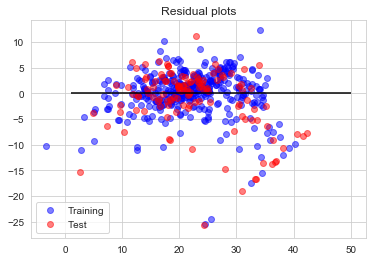

In [80]:
train = plt.scatter(pred_train, (pred_train - Y_train), c='b', alpha=.5)
test = plt.scatter(pred_test, (pred_test-Y_test),c='r',alpha=.5)
plt.hlines(y=0,xmin=1.0,xmax=50)

plt.legend((train,test),('Training','Test'), loc='lower left')
plt.title('Residual plots')